In [91]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

combined_df = pd.merge(ride_data,city_data,on='city',how="left")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

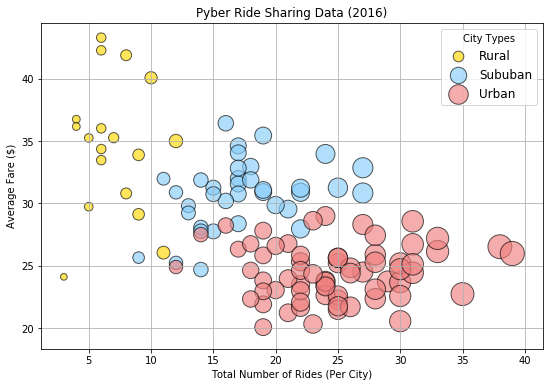

In [107]:
# Obtain the x and y coordinates for each of the three city types
gb_rides_df = combined_df.groupby(['type','city'])

test_df = pd.DataFrame(gb_rides_df['fare'].mean())
test_df['Total Count'] = gb_rides_df['ride_id'].count()
test_df2 = test_df.reset_index()

x_coord_Rural = test_df2.loc[(test_df2['type']=='Rural'),'Total Count']
y_coord_Rural = test_df2.loc[(test_df2['type']=='Rural'),'fare']
x_coord_Sub = test_df2.loc[(test_df2['type']=='Suburban'),'Total Count']
y_coord_Sub = test_df2.loc[(test_df2['type']=='Suburban'),'fare']

x_coord_Urban = test_df2.loc[(test_df2['type']=='Urban'),'Total Count']
y_coord_Urban = test_df2.loc[(test_df2['type']=='Urban'),'fare']

# Build the scatter plots for each city types
alpha = .65
plt.figure(figsize=(9,6))
plt.scatter(x_coord_Rural,y_coord_Rural, label='Rural',marker="o",color='gold',edgecolors="black",alpha= alpha,s = (x_coord_Rural*15))
plt.scatter(x_coord_Sub,y_coord_Sub, label='Sububan',marker="o",color='lightskyblue', edgecolors="black",alpha= alpha, s = (x_coord_Sub*15))
plt.scatter(x_coord_Urban,y_coord_Urban, label='Urban',marker="o",color='lightcoral', edgecolors="black",alpha= alpha, s = (x_coord_Urban*15))

# Incorporate the other graph properties
# plt.xlim(0,45)
# plt.ylim(0,45)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
# Create a legend
plt.legend(title="City Types", loc="best", fontsize="large")

# Incorporate a text label regarding circle size


# Save Figure
plt.savefig("Pyber_Ride_Sharing_Scatter_Plot")
# Show plot
plt.show()

## Total Fares by City Type

In [29]:
# Calculate Type Percents
TF_by_city = pd.DataFrame(gb_rides_df['fare'].sum())
TF_by_city_reset = TF_by_city.reset_index()
TF_group_by = TF_by_city_reset.groupby(['type'])
TF_GB_type_df = pd.DataFrame(TF_group_by['fare'].sum())
TF_GB_type_df_reset = TF_GB_type_df.reset_index()
TF_GB_type_df_reset

,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


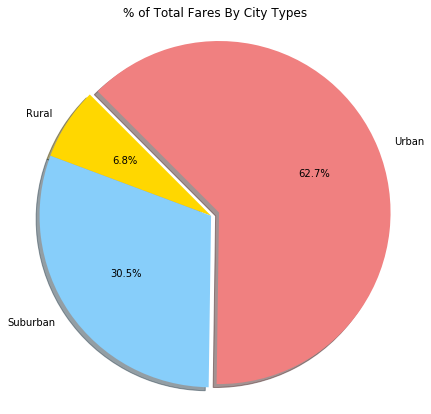

In [103]:
# Build Pie Chart
labels = TF_GB_type_df_reset['type']
values = TF_GB_type_df_reset['fare']
colors = ["gold","lightskyblue","lightcoral"]
explode = [0,0,0.05]
plt.figure(figsize=(7,7))
plt.title("% of Total Fares By City Types")
plt.pie(values, labels=labels, autopct='%.1f%%', colors=colors,explode=explode, startangle=135, shadow=True, radius=1)
plt.axis("equal")

# Save Figure
plt.savefig("PiePercent_of_Total_Fare_by_City_Type.png")

# Show Figure
plt.show()

## Total Rides by City Type

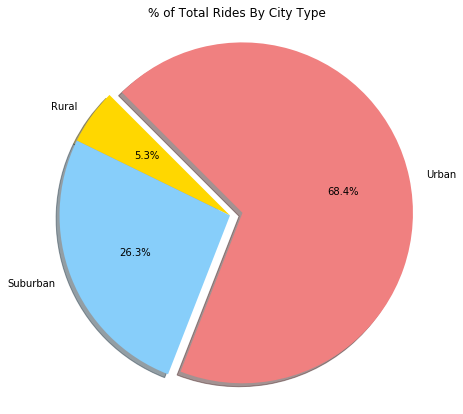

In [99]:
# Calculate Ride Percents
rides_groupby = combined_df.groupby(['type'])
rides_groupby_df = pd.DataFrame(rides_groupby['fare'].count())
rides_groupby_df_reset = rides_groupby_df.reset_index()

# Build Pie Chart

labels = rides_groupby_df_reset['type']
values = rides_groupby_df_reset['fare']
colors = ["gold","lightskyblue","lightcoral"]
explode = [0,0,0.075]
plt.figure(figsize=(7,7))
plt.title("% of Total Rides By City Type")
plt.pie(values, labels=labels, autopct='%.1f%%', colors=colors,explode=explode, startangle=135, shadow=True, radius=1)
plt.axis("equal")

# Save Figure
plt.savefig("PiePercent_of_Total_Rides_by_City_Type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


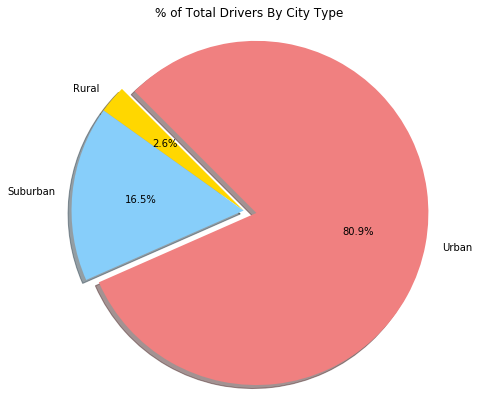

In [98]:
# Remove Duplicate Cities
city_drivercount_type = combined_df[['city','driver_count','type']]
city_drivercount_type_rmdups = city_drivercount_type.drop_duplicates()

# Calculate Driver Percents
driver_gb = city_drivercount_type_rmdups.groupby(['type'])
driver_df = pd.DataFrame(driver_gb['driver_count'].sum())
driver_df_reset = driver_df.reset_index()

# Build Pie Charts
labels = driver_df_reset['type']
values = driver_df_reset['driver_count']
colors = ["gold","lightskyblue","lightcoral"]
explode = [0,0,0.075]
plt.figure(figsize=(7,7))
plt.title("% of Total Drivers By City Type")
plt.pie(values, labels=labels, autopct='%.1f%%', colors=colors,explode=explode, startangle=135, shadow=True, radius=1)
plt.axis("equal")

# Save Figure
plt.savefig("PiePercent_of_Total_Drivers_by_City_Type.png")

# Show Figure
plt.show()